# Análise de Dados sobre Artistas Contemporâneos

## Introdução

Este projeto visa explorar e analisar os dados de artistas contemporâneos utilizando o conjunto de dados disponível do Tate, que contém informações sobre artistas e suas obras. O foco da análise é entender a distribuição de gêneros, a idade dos artistas e as nacionalidades dos mesmos, especialmente aqueles nascidos após 1950.

## Objetivos do Projeto

1. **Visualizar a Distribuição de Gêneros**: Analisar a proporção de artistas masculinos e femininos e sua evolução ao longo do tempo.
2. **Analisar a Idade dos Artistas**: Calcular a idade dos artistas contemporâneos e visualizar sua distribuição.
3. **Explorar Nacionalidade**: Identificar os países de origem mais comuns entre os artistas e analisar como o gênero está distribuído entre esses países.
4. **Criar Gráficos Informativos**: Utilizar gráficos para apresentar visualmente os dados e insights obtidos durante a análise.

## Dados Utilizados

Os dados utilizados neste projeto são:

- **artist_data.csv**: Contém informações sobre os artistas, incluindo nome, gênero, ano de nascimento e lugar de nascimento.
- **artwork_data.csv**: Contém informações sobre as obras de arte, incluindo título, ano de criação, técnica utilizada e informações sobre a aquisição.

### Estrutura dos Dados

- **artist_data.csv**:
    - `id`: Identificador único do artista
    - `yearOfBirth`: Ano de nascimento do artista
    - `gender`: Gênero do artista
    - `placeOfBirth`: País de nascimento do artista

- **artwork_data.csv**:
    - `id`: Identificador único da obra
    - `artist`: Nome do artista
    - `title`: Título da obra
    - `year`: Ano em que a obra foi criada
    - `medium`: Técnica utilizada na obra

## Metodologia

A análise será realizada em várias etapas, incluindo a leitura dos dados, limpeza e transformação dos dados, visualização dos dados e interpretação dos resultados. Utilizaremos bibliotecas como `pandas`, `seaborn` e `matplotlib` para facilitar a manipulação e visualização dos dados.

Vamos começar!


In [2]:
# Importando bibliotecas necessárias
import pandas as pd
import seaborn as sns
import matplotlib.pyplot as plt
from datetime import datetime


In [3]:
# Carregar os datasets
artists = pd.read_csv(r'../artist_data.csv')
artwork = pd.read_csv(r'../artwork_data.csv', dtype={'year': str, 'height': str})

## Passo 1: Leitura e Visualização dos Dados

In [4]:
# Informação dos tipos de colunas presentes no arquivo
artists.info()
print()
artwork.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 3532 entries, 0 to 3531
Data columns (total 9 columns):
 #   Column        Non-Null Count  Dtype  
---  ------        --------------  -----  
 0   id            3532 non-null   int64  
 1   name          3532 non-null   object 
 2   gender        3416 non-null   object 
 3   dates         3470 non-null   object 
 4   yearOfBirth   3472 non-null   float64
 5   yearOfDeath   2228 non-null   float64
 6   placeOfBirth  3040 non-null   object 
 7   placeOfDeath  1453 non-null   object 
 8   url           3532 non-null   object 
dtypes: float64(2), int64(1), object(6)
memory usage: 248.5+ KB

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 69201 entries, 0 to 69200
Data columns (total 20 columns):
 #   Column              Non-Null Count  Dtype  
---  ------              --------------  -----  
 0   id                  69201 non-null  int64  
 1   accession_number    69201 non-null  object 
 2   artist              69201 non-null  object 
 3

In [5]:
# Visualizar os nomes das colunas
print("Colunas do dataset de artwork:") 
artwork.columns

Colunas do dataset de artwork:


Index(['id', 'accession_number', 'artist', 'artistRole', 'artistId', 'title',
       'dateText', 'medium', 'creditLine', 'year', 'acquisitionYear',
       'dimensions', 'width', 'height', 'depth', 'units', 'inscription',
       'thumbnailCopyright', 'thumbnailUrl', 'url'],
      dtype='object')

In [6]:
# ler as primeiras 5 linhas do arquivo
artists.head()

,id,name,gender,dates,yearOfBirth,yearOfDeath,placeOfBirth,placeOfDeath,url
0,10093,"Abakanowicz, Magdalena",Female,born 1930,1930.0,NaN,Polska,NaN,http://www.tate.org.uk/art/artists/magdalena-a...
1,0,"Abbey, Edwin Austin",Male,1852–1911,1852.0,1911.0,"Philadelphia, United States","London, United Kingdom",http://www.tate.org.uk/art/artists/edwin-austi...
2,2756,"Abbott, Berenice",Female,1898–1991,1898.0,1991.0,"Springfield, United States","Monson, United States",http://www.tate.org.uk/art/artists/berenice-ab...
3,1,"Abbott, Lemuel Francis",Male,1760–1803,1760.0,1803.0,"Leicestershire, United Kingdom","London, United Kingdom",http://www.tate.org.uk/art/artists/lemuel-fran...
4,622,"Abrahams, Ivor",Male,born 1935,1935.0,NaN,"Wigan, United Kingdom",NaN,http://www.tate.org.uk/art/artists/ivor-abraha...


In [7]:
artwork.head()

,id,accession_number,artist,artistRole,artistId,title,dateText,medium,creditLine,year,acquisitionYear,dimensions,width,height,depth,units,inscription,thumbnailCopyright,thumbnailUrl,url
0,1035,A00001,"Blake, Robert",artist,38,A Figure Bowing before a Seated Old Man with h...,date not known,"Watercolour, ink, chalk and graphite on paper....",Presented by Mrs John Richmond 1922,NaN,1922.0,support: 394 x 419 mm,394,419,NaN,mm,NaN,NaN,http://www.tate.org.uk/art/images/work/A/A00/A...,http://www.tate.org.uk/art/artworks/blake-a-fi...
1,1036,A00002,"Blake, Robert",artist,38,"Two Drawings of Frightened Figures, Probably f...",date not known,Graphite on paper,Presented by Mrs John Richmond 1922,NaN,1922.0,support: 311 x 213 mm,311,213,NaN,mm,NaN,NaN,http://www.tate.org.uk/art/images/work/A/A00/A...,http://www.tate.org.uk/art/artworks/blake-two-...
2,1037,A00003,"Blake, Robert",artist,38,The Preaching of Warning. Verso: An Old Man En...,?c.1785,Graphite on paper. Verso: graphite on paper,Presented by Mrs John Richmond 1922,1785,1922.0,support: 343 x 467 mm,343,467,NaN,mm,NaN,NaN,http://www.tate.org.uk/art/images/work/A/A00/A...,http://www.tate.org.uk/art/artworks/blake-the-...
3,1038,A00004,"Blake, Robert",artist,38,Six Drawings of Figures with Outstretched Arms,date not known,Graphite on paper,Presented by Mrs John Richmond 1922,NaN,1922.0,support: 318 x 394 mm,318,394,NaN,mm,NaN,NaN,http://www.tate.org.uk/art/images/work/A/A00/A...,http://www.tate.org.uk/art/artworks/blake-six-...
4,1039,A00005,"Blake, William",artist,39,The Circle of the Lustful: Francesca da Rimini...,"1826–7, reprinted 1892",Line engraving on paper,Purchased with the assistance of a special gra...,1826,1919.0,image: 243 x 335 mm,243,335,NaN,mm,NaN,NaN,http://www.tate.org.uk/art/images/work/A/A00/A...,http://www.tate.org.uk/art/artworks/blake-the-...


In [8]:
# Verificar se há valores nulos
print(artists['placeOfBirth'].isnull().sum())  # Número de valores nulos na coluna placeOfBirth


492


In [9]:
artists.loc[artists['placeOfBirth'].isnull(), 'placeOfBirth'] = 'Desconhecido'
# Verificar se os valores nulos foram preenchidos
print(artists['placeOfBirth'].isnull().sum())  # Deve retornar 0


0


#### Proporção Homens e Mulheres:

#### Visualizar a Distribuição das Datas de Nascimento dos Artistas:

In [10]:
# remove valores nulos
artists = artists.dropna(subset=['yearOfBirth'])


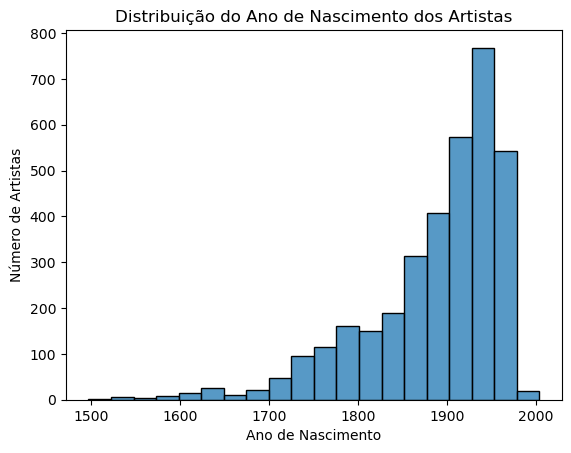

In [11]:

# criação do histograma para o ano de nascimento
sns.histplot(artists['yearOfBirth'], bins=20)
plt.xlabel('Ano de Nascimento')
plt.ylabel('Número de Artistas')
plt.title('Distribuição do Ano de Nascimento dos Artistas')
plt.show()

#### Analisar Nacionalidade dos Artistas:

In [12]:
# Contar os 10 países mais comuns de nascimento
top_countries = artists['placeOfBirth'].value_counts().head(10)
print("Top 10 países de nascimento dos artistas:")
top_countries

Top 10 países de nascimento dos artistas:


placeOfBirth
London, United Kingdom        445
Desconhecido                  435
Paris, France                  57
Edinburgh, United Kingdom      47
New York, United States        43
Glasgow, United Kingdom        35
England, United Kingdom        30
Dublin, Éire                   29
Liverpool, United Kingdom      23
Birmingham, United Kingdom     22
Name: count, dtype: int64

In [13]:
artists.columns

Index(['id', 'name', 'gender', 'dates', 'yearOfBirth', 'yearOfDeath',
       'placeOfBirth', 'placeOfDeath', 'url'],
      dtype='object')

In [14]:
# Criar colunas 'Female' e 'Male' baseadas na coluna 'gender'
artists['Female'] = (artists['gender'] == 'Female').astype(int)
artists['Male'] = (artists['gender'] == 'Male').astype(int)

In [15]:
# Contar os artistas por país de nascimento
top_countries = artists['placeOfBirth'].value_counts().head(10)

# Criar um DataFrame para facilitar a plotagem
top_countries_df = pd.DataFrame(top_countries).reset_index()
top_countries_df.columns = ['País de Nascimento', 'Número de Artistas']


C:\Users\pietr\AppData\Local\Temp\ipykernel_13232\3443085948.py:3: FutureWarning: 

Passing `palette` without assigning `hue` is deprecated and will be removed in v0.14.0. Assign the `y` variable to `hue` and set `legend=False` for the same effect.

  sns.barplot(x='Número de Artistas', y='País de Nascimento', data=top_countries_df, palette='muted')


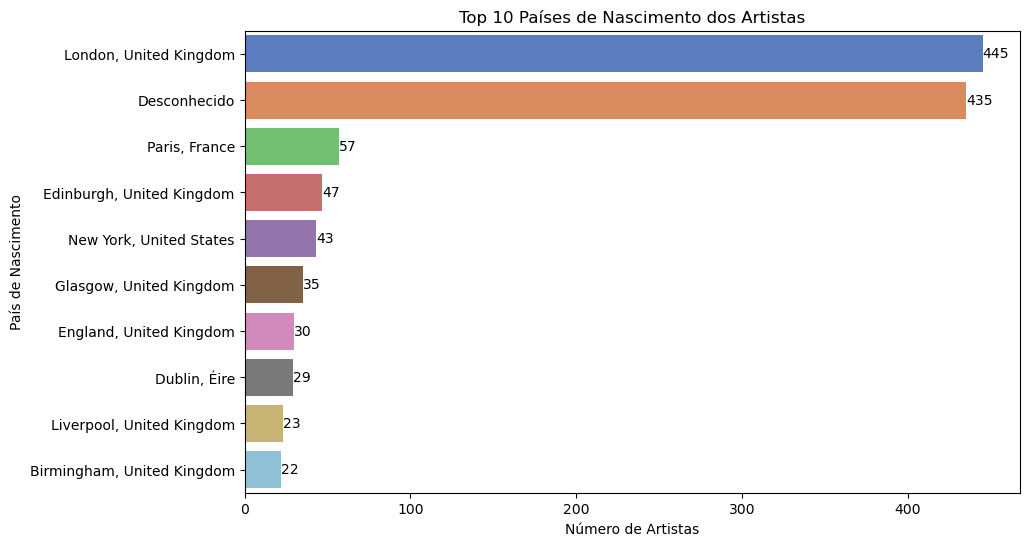

In [16]:
# Plotar gráfico de barras
plt.figure(figsize=(10, 6))
sns.barplot(x='Número de Artistas', y='País de Nascimento', data=top_countries_df, palette='muted')

# Adicionar título e rótulos
plt.title('Top 10 Países de Nascimento dos Artistas')
plt.xlabel('Número de Artistas')
plt.ylabel('País de Nascimento')

# Adicionar anotações
for index, value in enumerate(top_countries_df['Número de Artistas']):
    plt.text(value, index, str(value), va='center')

plt.show();

#### Filtrar Dados por Período

In [17]:
# Filtrando para Artistas nascidos depois de 1950
contemporary_artists = artists[artists['yearOfBirth']>=1950]
contemporary_artists.head()

,id,name,gender,dates,yearOfBirth,yearOfDeath,placeOfBirth,placeOfDeath,url,Female,Male
5,2606,Absalon,Male,1964–1993,1964.0,1993.0,"Tel Aviv-Yafo, Yisra'el","Paris, France",http://www.tate.org.uk/art/artists/absalon-2606,0,1
6,9550,"Abts, Tomma",Female,born 1967,1967.0,NaN,"Kiel, Deutschland",NaN,http://www.tate.org.uk/art/artists/tomma-abts-...,1,0
21,3098,"Ahtila, Eija-Liisa",Female,born 1959,1959.0,NaN,"Hämeenlinna, Suomi",NaN,http://www.tate.org.uk/art/artists/eija-liisa-...,1,0
22,8208,"Ai, Weiwei",Male,born 1957,1957.0,NaN,"Beijing, Zhonghua",NaN,http://www.tate.org.uk/art/artists/ai-weiwei-8208,0,1
25,14744,"Aksel, Erdag",Male,born 1953,1953.0,NaN,"Izmir, Türkiye",NaN,http://www.tate.org.uk/art/artists/erdag-aksel...,0,1


In [18]:
# contagem de artistas por gênero
gender_counts = artists['gender'].value_counts()
gender_counts

gender
Male      2872
Female     512
Name: count, dtype: int64

#### Filtrar dados por período

In [19]:
# Contar Artistas por gêneros nascidos após 1950
gender_counts = contemporary_artists['gender'].value_counts()
gender_counts

gender
Male      422
Female    190
Name: count, dtype: int64

#### Visualizar copm grágico de barras

C:\Users\pietr\AppData\Local\Temp\ipykernel_13232\1849601854.py:7: FutureWarning: 

Passing `palette` without assigning `hue` is deprecated and will be removed in v0.14.0. Assign the `x` variable to `hue` and set `legend=False` for the same effect.

  sns.barplot(x=gender_counts.index, y=gender_counts.values, palette=colors)


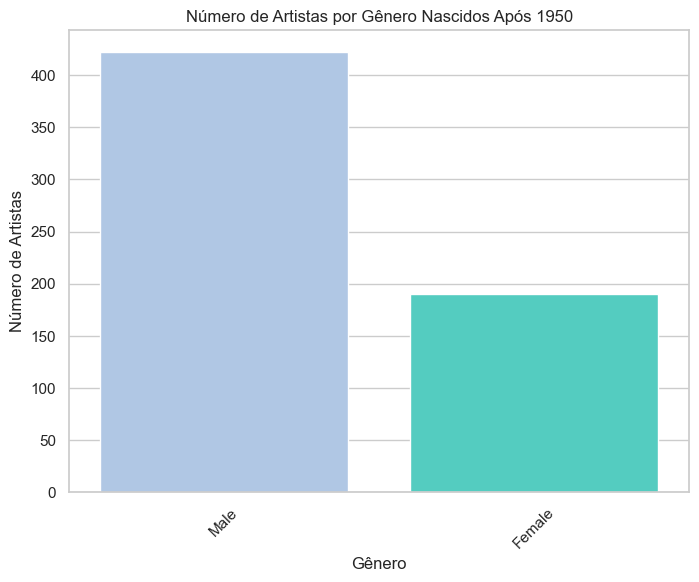

In [20]:
# Configurar o estilo do gráfico
sns.set(style='whitegrid')

# Criar o gráfico de barras
plt.figure(figsize=(8, 6))
colors = ['#A7C6ED' if gender == 'Male' else '#40E0D0' for gender in gender_counts.index]  # Definindo cores
sns.barplot(x=gender_counts.index, y=gender_counts.values, palette=colors)

# Adicionar Títulos e Rótulos
plt.title('Número de Artistas por Gênero Nascidos Após 1950')
plt.xlabel('Gênero')
plt.ylabel('Número de Artistas')
plt.xticks(rotation=45)  # Melhorar legibilidade
plt.show()

#### Analisar Idade dos Artistas Contemporanêos - Nascidos apos 1950

In [21]:
# Calcular idade dos artistas (considerando o ano atual se o ano de falecimento for NaN)
current_year = datetime.now().year
contemporary_artists['age'] = contemporary_artists.apply(
    lambda x: current_year - x['yearOfBirth'] if pd.isna(x['yearOfDeath']) else x['yearOfDeath'] - x['yearOfBirth'],
    axis=1
)


C:\Users\pietr\AppData\Local\Temp\ipykernel_13232\217432496.py:3: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  contemporary_artists['age'] = contemporary_artists.apply(


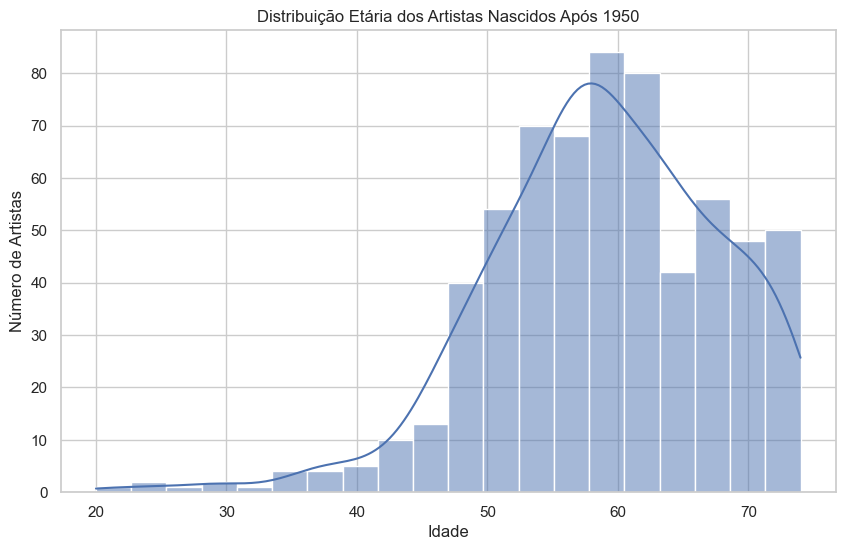

In [22]:
# Visualizar distribuição etária
plt.figure(figsize=(10, 6))
sns.histplot(contemporary_artists['age'], bins=20, kde=True)
plt.title('Distribuição Etária dos Artistas Nascidos Após 1950')
plt.xlabel('Idade')
plt.ylabel('Número de Artistas')
plt.grid(True)
plt.show()

#### Explorar Gênero e Nacionalidade em Conjunto

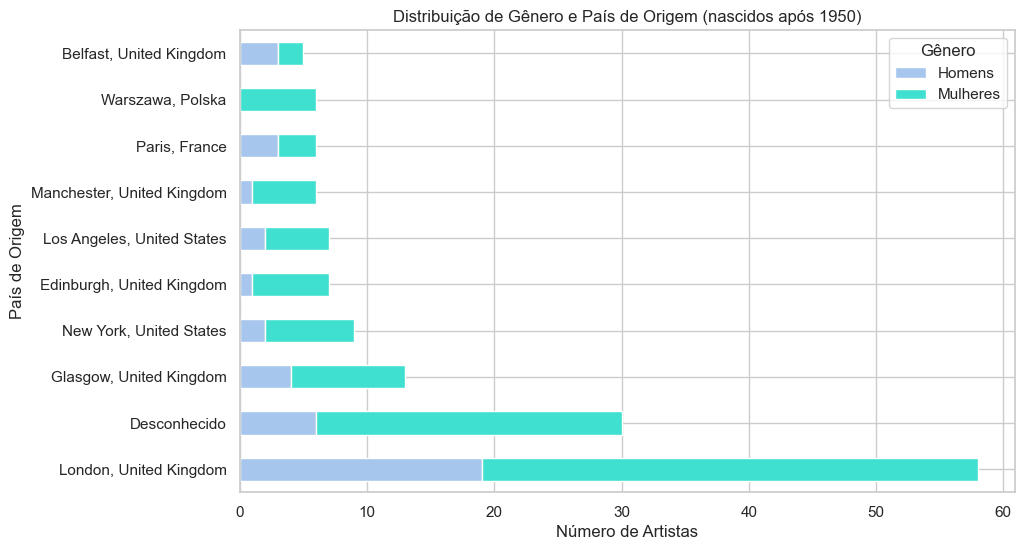

In [23]:
# Tabela cruzada de gênero e país de origem
gender_country = contemporary_artists.pivot_table(index='placeOfBirth', columns='gender', aggfunc='size', fill_value=0)

# Selecionar os 10 países com o maior número de artistas
country_counts = gender_country.sum(axis=1).nlargest(10)
top_countries = gender_country.loc[country_counts.index]

# Visualizar com gráficos de barras empilhadas
colors = ['#A7C6ED', '#40E0D0'] 
top_countries.plot(kind='barh', stacked=True, figsize=(10, 6), color=colors)  # Mudando para 'barh'
plt.title('Distribuição de Gênero e País de Origem (nascidos após 1950)')
plt.xlabel('Número de Artistas')  # Agora é o eixo X
plt.ylabel('País de Origem')  # Agora é o eixo Y
plt.legend(title='Gênero', labels=['Homens', 'Mulheres'])
plt.show()

